In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


2023-07-13 11:56:23.550230: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Configure

In [2]:
datadir = 'data/old'
nshowers = 10000
epochs = 100

# cut configuration
c = xfirst.config.cut.A3

# features
xp = xfirst.data.load_depths('data/old', c).index.to_list()
xf = xfirst.profile_functions.usp().parameter_names
x = xp + xf

# target
y = 'Xfirst'

# layers
l = [512, 512, 512, 512]

### Load profiles

In [3]:
data = xfirst.data.load_profiles(
  datadir = datadir,
  cut = c,
  nshowers = nshowers,
  norm = True,
  xfirst = True,
  fits = xf,
)

In [4]:
data['train']

Edep_10   Edep_11   Edep_12   Edep_13   Edep_14   Edep_15   Edep_16  \
   id                                                                           
p  0    -0.549151 -0.585772 -0.639062 -0.678171 -0.705761 -0.723088 -0.732534   
   1    -0.349174 -0.432946 -0.497362 -0.560156 -0.611769 -0.639410 -0.659081   
   2    -0.551399 -0.609168 -0.660474 -0.699406 -0.727346 -0.744910 -0.756409   
   3    -0.514601 -0.568243 -0.616581 -0.652739 -0.677582 -0.696610 -0.707994   
   4     4.848932  4.518624  3.770723  3.149398  2.730317  2.227969  1.880710   
...           ...       ...       ...       ...       ...       ...       ...   
Fe 9995 -0.165007 -0.142646 -0.114958 -0.085959 -0.057487 -0.032853 -0.013967   
   9996  2.108068  2.463775  2.778593  3.061480  3.285461  3.452573  3.575829   
   9997 -0.231392 -0.226382 -0.212497 -0.194823 -0.176564 -0.157012 -0.140060   
   9998 -0.414200 -0.443299 -0.466057 -0.481336 -0.490643 -0.495618 -0.498281   
   9999 -0.454072 -0.488335 -0.514706 -0.532325 -0.542602 -0.547714 -0.548924   

          Edep_17   Edep_18   Edep_19  ...   Edep_96   Edep_97   Edep_98  \
   id                                  ...                                 
p  0    -0.736839 -0.737760 -0.736950  ... -0.645269 -0.643836 -0.642380   
   1    -0.664292 -0.666553 -0.667523  ...  0.068964  0.074290  0.079451   
   2    -0.762480 -0.765900 -0.767676  ... -0.716323 -0.714476 -0.712595   
   3    -0.716371 -0.721435 -0.725131  ... -0.715443 -0.713475 -0.711474   
   4     1.593612  1.452531  1.241428  ...  1.530551  1.538545  1.546177   
...           ...       ...       ...  ...       ...       ...       ...   
Fe 9995  0.000671  0.011269  0.018147  ... -0.553622 -0.554740 -0.555711   
   9996  3.657519  3.712095  3.748859  ...  2.381297  2.355816  2.330444   
   9997 -0.124409 -0.109612 -0.096968  ... -0.324249 -0.327600 -0.330830   
   9998 -0.499584 -0.500697 -0.502434  ... -0.698787 -0.697489 -0.696124   
   9999 -0.548795 -0.548134 -0.547662  ... -0.727532 -0.726066 -0.724524   

          Edep_99    lgNmax      Xmax         L         R     Xfirst  \
   id                                                                  
p  0    -0.640902 -0.580124  0.013640 -0.020527 -0.126321   6.633267   
   1     0.084445  0.529597  0.159663  0.026559 -0.347164  78.731773   
   2    -0.710678 -0.960799 -0.014697 -0.048831 -0.675027  25.302431   
   3    -0.709443 -0.973751 -0.007825 -0.027991 -1.034086  10.474668   
   4     1.553442  1.278946  0.142144  0.026293 -2.230772   4.748230   
...           ...       ...       ...       ...       ...        ...   
Fe 9995 -0.556541 -0.066184 -0.119862 -0.017137  1.043737   7.012742   
   9996  2.305193  1.654970  0.006688  0.007995 -0.310825   6.769275   
   9997 -0.333939  0.315421 -0.042089 -0.024262  0.073824  17.167721   
   9998 -0.694694 -0.728254 -0.102095 -0.016153  0.509202   7.677325   
   9999 -0.722909 -0.862937 -0.148571 -0.047333  0.853469  15.061576   

               lgE  
   id               
p  0     18.650818  
   1     19.294729  
   2     18.418591  
   3     18.417645  
   4     19.745779  
...            ...  
Fe 9995  18.969194  
   9996  19.958038  
   9997  19.181553  
   9998  18.591356  
   9999  18.499905  

[50000 rows x 96 columns]

### Train the MLP

In [5]:
model = xfirst.models.multilayer_perceptron_regressor(
  input = len(x),
  layers = l,
  epochs = epochs,
).fit(data, x, y)

+ training the model on ['Edep_10', 'Edep_11', 'Edep_12', 'Edep_13', 'Edep_14', 'Edep_15', 'Edep_16', 'Edep_17', 'Edep_18', 'Edep_19', 'Edep_20', 'Edep_21', 'Edep_22', 'Edep_23', 'Edep_24', 'Edep_25', 'Edep_26', 'Edep_27', 'Edep_28', 'Edep_29', 'Edep_30', 'Edep_31', 'Edep_32', 'Edep_33', 'Edep_34', 'Edep_35', 'Edep_36', 'Edep_37', 'Edep_38', 'Edep_39', 'Edep_40', 'Edep_41', 'Edep_42', 'Edep_43', 'Edep_44', 'Edep_45', 'Edep_46', 'Edep_47', 'Edep_48', 'Edep_49', 'Edep_50', 'Edep_51', 'Edep_52', 'Edep_53', 'Edep_54', 'Edep_55', 'Edep_56', 'Edep_57', 'Edep_58', 'Edep_59', 'Edep_60', 'Edep_61', 'Edep_62', 'Edep_63', 'Edep_64', 'Edep_65', 'Edep_66', 'Edep_67', 'Edep_68', 'Edep_69', 'Edep_70', 'Edep_71', 'Edep_72', 'Edep_73', 'Edep_74', 'Edep_75', 'Edep_76', 'Edep_77', 'Edep_78', 'Edep_79', 'Edep_80', 'Edep_81', 'Edep_82', 'Edep_83', 'Edep_84', 'Edep_85', 'Edep_86', 'Edep_87', 'Edep_88', 'Edep_89', 'Edep_90', 'Edep_91', 'Edep_92', 'Edep_93', 'Edep_94', 'Edep_95', 'Edep_96', 'Edep_97', 'Edep_9

2023-07-13 11:56:54.473332: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Validation curve

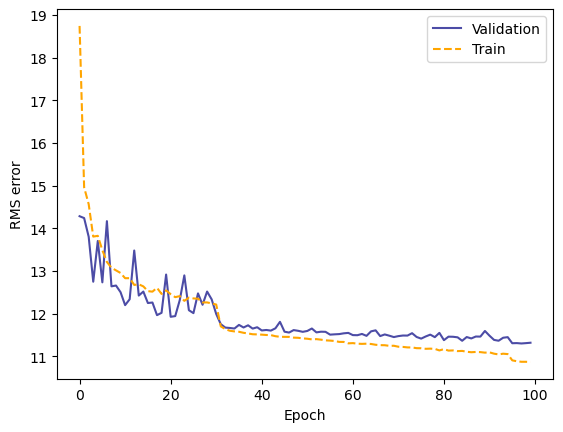

In [6]:
fig = model.draw()

### Compute predictions

+ computing predictions
1563/1563 [==============================] - 5s 3ms/step
+ drawing predictions


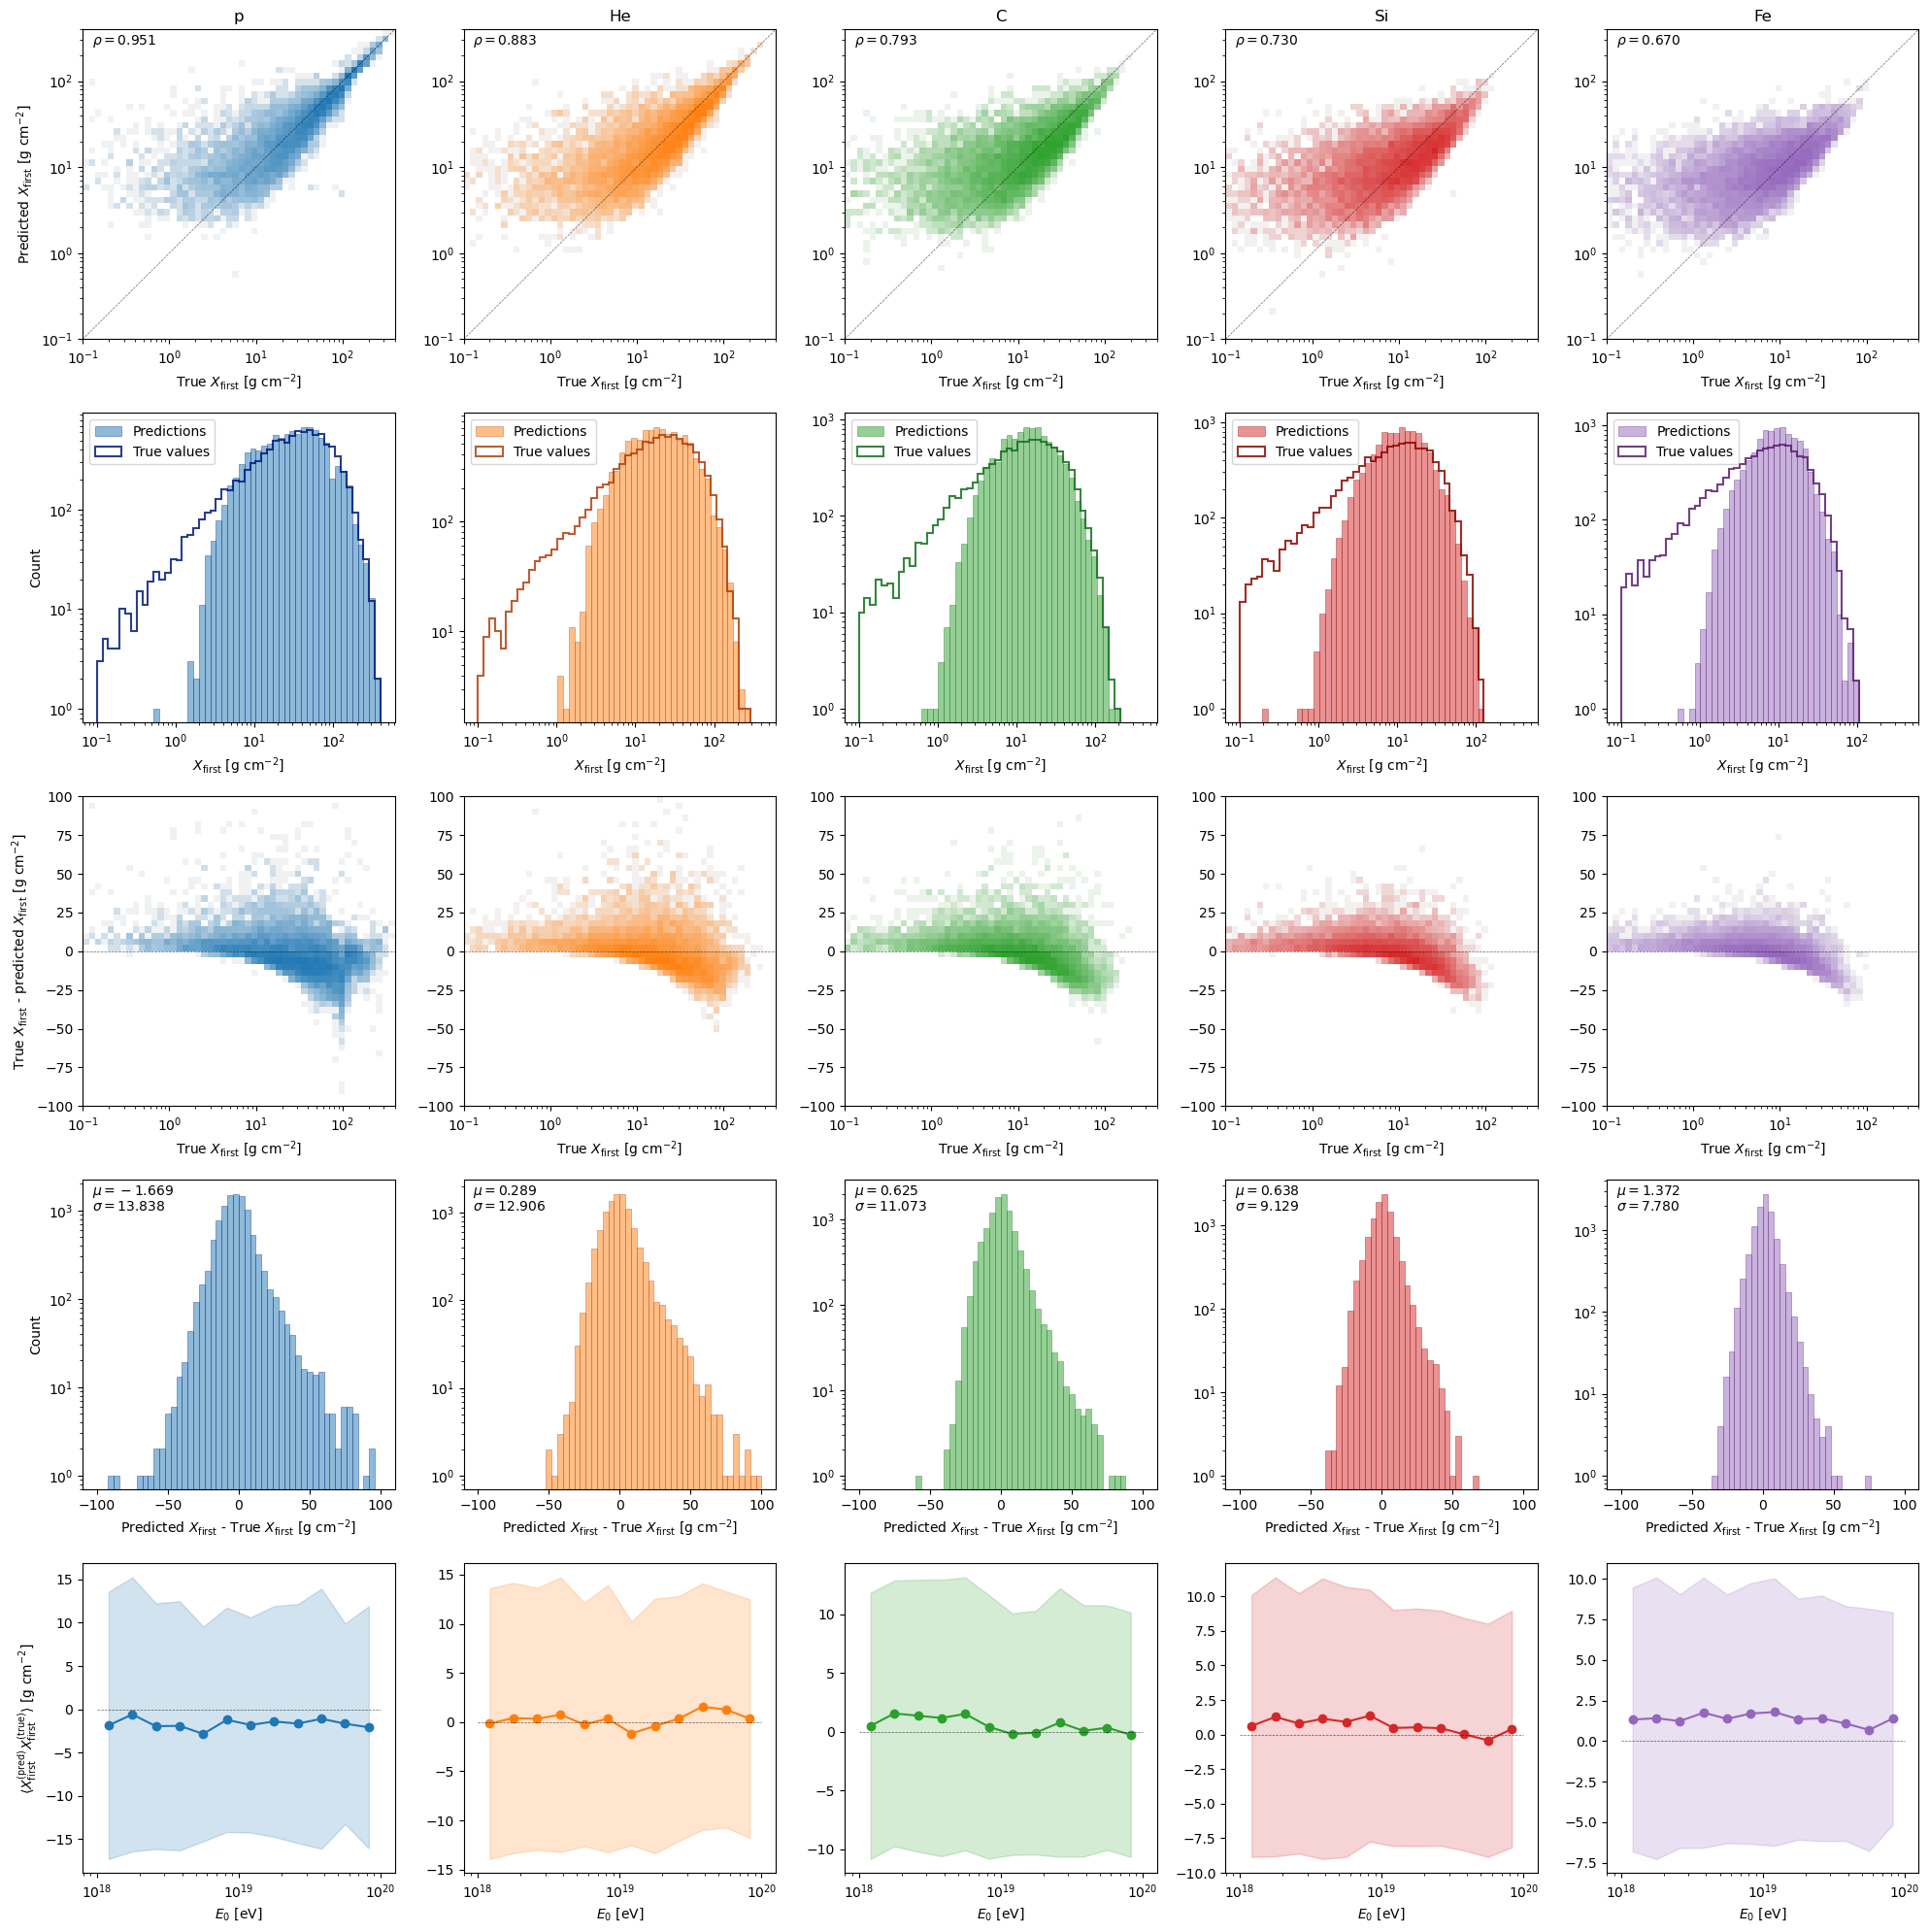

In [7]:
results = model.eval(data, plot = True)